In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df= pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Housing.csv')

In [4]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


<AxesSubplot:ylabel='Frequency'>

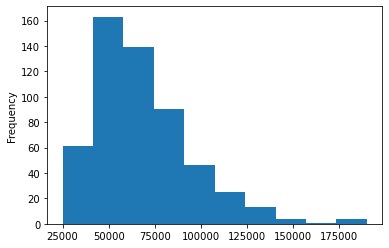

In [21]:
df['price'].plot(kind='hist')

### One Hot Encoding


Encode using pandas `get_dummies` function

In [12]:
X = df[['driveway']]
y = df['price']

In [32]:
dum_X = pd.get_dummies(X, drop_first=True)      # drop_first=True to avoid the first column which is the constant column
print(dum_X.head(10))

lr = LinearRegression()
lr.fit(dum_X, y)

print('Intercept',lr.intercept_)
print('Coeffecients',lr.coef_)

equation = str(lr.intercept_)
for i in range(len(lr.coef_)):
    equation += f' + {lr.coef_[i]} * X{i+1}'
print("Equation of the line:",equation)
 

   driveway_yes
0             1
1             1
2             1
3             1
4             1
5             1
6             1
7             1
8             1
9             1
Intercept 48555.77922077924
Coeffecients [22778.11630161]
Equation of the line: 48555.77922077924 + 22778.116301608832 * X1


In [ ]:
df.groupby('driveway')['price'].mean()          # This show similarity between driveway and price as linear regression

driveway
no     48555.779221
yes    71333.895522
Name: price, dtype: float64

In [34]:
dum_X = pd.get_dummies(X)      # drop_first=True to avoid the first column which is the constant column
dum_X.drop('driveway_yes', axis=1, inplace=True)
print(dum_X.head(10))

lr = LinearRegression()
lr.fit(dum_X, y)

print('Intercept',lr.intercept_)
print('Coeffecients',lr.coef_)

equation = str(lr.intercept_)
for i in range(len(lr.coef_)):
    equation += f' + {lr.coef_[i]} * X{i+1}'
print("Equation of the line:",equation)
 

   driveway_no
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
Intercept 71333.89552238806
Coeffecients [-22778.11630161]
Equation of the line: 71333.89552238806 + -22778.11630160883 * X1


Enconde using `OneHotEncoder`

In [35]:
X = df[['driveway']]
y = df['price']

In [41]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
dum_X = ohe.fit_transform(X)

lr = LinearRegression()
lr.fit(dum_X, y)

print('Intercept',lr.intercept_)
print('Coeffecients',lr.coef_)

equation = str(lr.intercept_)
for i in range(len(lr.coef_)):
    equation += f' + {lr.coef_[i]} * X{i+1}'
print("Equation of the line:",equation)
 

Intercept -7.306108739844494e+18
Coeffecients [7.30610874e+18 7.30610874e+18]
Equation of the line: -7.306108739844494e+18 + 7.306108739844542e+18 * X1 + 7.306108739844567e+18 * X2


### Using Two columns

In [43]:
X = df[['driveway', 'airco']]
y = df['price']

In [44]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
dum_X = ohe.fit_transform(X)

lr = LinearRegression()
lr.fit(dum_X, y)

print('Intercept',lr.intercept_)
print('Coeffecients',lr.coef_)

equation = str(lr.intercept_)
for i in range(len(lr.coef_)):
    equation += f' + {lr.coef_[i]} * X{i+1}'
print("Equation of the line:",equation)

Intercept 43790.670320318815
Coeffecients [19302.6687155 24460.8923557]
Equation of the line: 43790.670320318815 + 19302.66871550188 * X1 + 24460.89235569682 * X2


### Using categorical with numerical data on hotencoding

In [53]:
X = df[['driveway', 'airco', 'bedrooms']]
y = df['price']

##### pd.get_dummies 
get_dummies does the hot encoding of only object type variables



In [47]:
dum_X = pd.get_dummies(X)
dum_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   bedrooms      546 non-null    int64
 1   driveway_no   546 non-null    uint8
 2   driveway_yes  546 non-null    uint8
 3   airco_no      546 non-null    uint8
 4   airco_yes     546 non-null    uint8
dtypes: int64(1), uint8(4)
memory usage: 6.5 KB


##### OneHotEncoder 
OneHotEndoder does encoding one object as well as numeric due to tihs more number of features will be created.

In [52]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
dum_X = ohe.fit_transform(X)
dum_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   driveway_yes  546 non-null    float64
 1   airco_yes     546 non-null    float64
 2   bedrooms_2    546 non-null    float64
 3   bedrooms_3    546 non-null    float64
 4   bedrooms_4    546 non-null    float64
 5   bedrooms_5    546 non-null    float64
 6   bedrooms_6    546 non-null    float64
dtypes: float64(7)
memory usage: 30.0 KB


##### Columns Transformer

In [54]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [59]:
str_col = df.columns[df.dtypes == 'object'].to_list()
num_col = df.columns[df.dtypes != 'object'].to_list()

In [60]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [65]:
ct = make_column_transformer(('passthrough', num_col), (ohe,str_col), verbose_feature_names_out=False).set_output(transform='pandas')
ct.fit_transform(df)

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,1.0,0.0,1.0,0.0,0.0,0.0
1,38500.0,4000,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,49500.0,3060,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,60500.0,6650,3,1,2,0,1.0,1.0,0.0,0.0,0.0,0.0
4,61000.0,6360,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1.0,1.0,0.0,0.0,1.0,0.0
542,94000.0,6000,3,2,4,0,1.0,0.0,0.0,0.0,1.0,0.0
543,103000.0,6000,3,2,4,1,1.0,1.0,0.0,0.0,1.0,0.0
544,105000.0,6000,3,2,2,1,1.0,1.0,0.0,0.0,1.0,0.0
